# Task 2: Credit Risk Prediction

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv(r'C:\Users\Administrator\.ipynb_checkpoints\test_Y3wMUE5_7gLdaTN.csv')# Inspect structure
print(df.shape, df.columns)
print(df.head())

(367, 12) Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             

In [24]:
print(df.isna().sum())


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [26]:
# Numeric: imputation with median
num_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print (df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [27]:
# Categorical: imputing with the most frequent
cat_cols = ['Gender','Dependents','Self_Employed']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print (df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16392\25053615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16392\25053615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

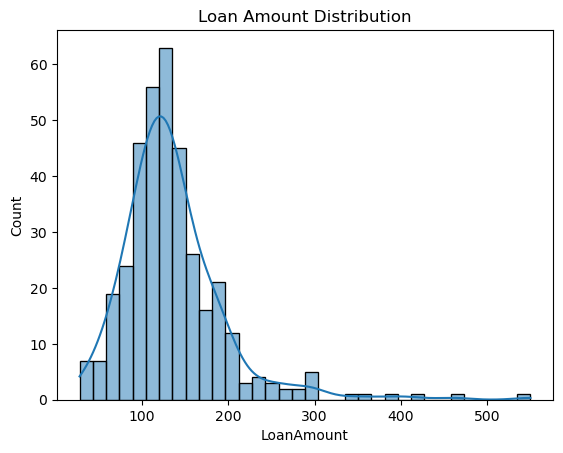

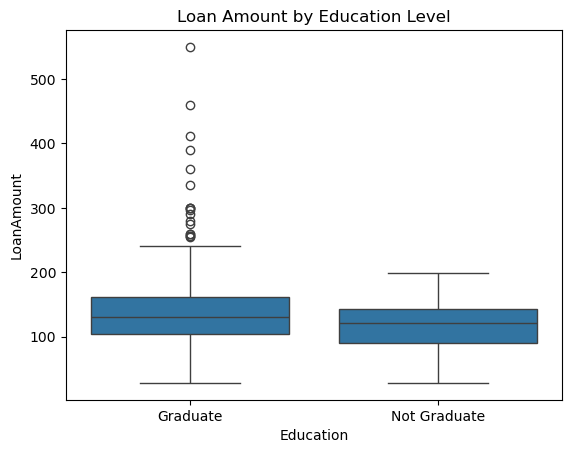

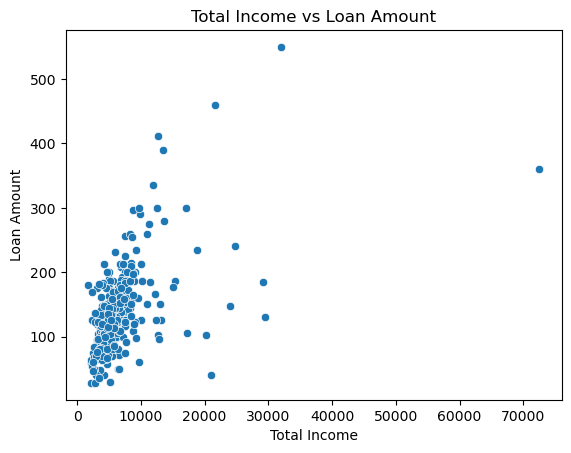

In [29]:
# Visualization
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education Level')
plt.show()

sns.scatterplot(x=df['ApplicantIncome']+df['CoapplicantIncome'], y=df['LoanAmount'])
plt.title('Total Income vs Loan Amount')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.show()

In [30]:
# Encoding categorical features
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area']:
    df[col] = le.fit_transform(df[col].astype(str))

In [31]:
# Engineer total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [32]:
df['Loan_Status'] = (df['Credit_History'] == 1).astype(int)
X = df[['Credit_History','TotalIncome','LoanAmount','Education']]
y = df['Loan_Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train[['TotalIncome','LoanAmount']] = scaler.fit_transform(X_train[['TotalIncome','LoanAmount']])
X_test[['TotalIncome','LoanAmount']] = scaler.transform(X_test[['TotalIncome','LoanAmount']])
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
# Evaluation
def evaluate(model_name, y_true, y_pred):
    print(f"== {model_name} ==")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
evaluate("Logistic Regression", y_test, y_pred_log)
evaluate("Decision Tree", y_test, y_pred_tree)


== Logistic Regression ==
Accuracy: 1.0
Confusion Matrix:
 [[28  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        83

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

== Decision Tree ==
Accuracy: 1.0
Confusion Matrix:
 [[28  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        83

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



# Summary

The objective of this task was to predict whether a loan applicant would default using the Loan Prediction dataset. The dataset was cleaned by handling missing values using median and mode imputation. Categorical variables were encoded, and new features like total income were engineered. Two classification models—Logistic Regression and Decision Tree—were trained and evaluated. Accuracy and confusion matrix results indicated that both models performed reasonably well in distinguishing between defaulters and non-defaulters. The analysis showed that features like credit history, loan amount, and applicant income strongly influenced the prediction outcomes.

